# Neural Net Weather Man 

## Data Acquisition

Importing the necessary libraries 

In [2]:
import tensorflow as tf
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset from the tensorflow datasets

Link: https://www.tensorflow.org/tutorials/structured_data/time_series

In [3]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [4]:
# Reading the csv into a pandas dataframe
df = pd.read_csv(csv_path)
print(df.shape)
df.head()

(420551, 15)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


The time series data was collected every ten minutes, I will reduce this down to a per hour reading. Reducing the dataframe from (420551,15) to (70091,15). 

In [5]:
df = df[5::6]
df.shape

(70091, 15)

In [6]:
# Change the index to a pandas datetime element to help with plotting operations. 
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


Necessary Plotting function

In [7]:
from sklearn.metrics import mean_squared_error as mse 

def plot_pred(model, X, y, start=0, end=100):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})

    plt.plot(df['Predictions'][start:end], 'r-', label="Predicted")
    plt.plot(df['Actuals'][start:end], 'b-', label="Actual")
    plt.legend()  
    plt.show()
    
    return df, mse(y, predictions)

## Single Variable Prediction 

The first section of this jupyter notebook will apply various Neural Networks to make time-series predictions on a single variable, temperature.

### Data Preprocessing

<AxesSubplot: xlabel='Date Time'>

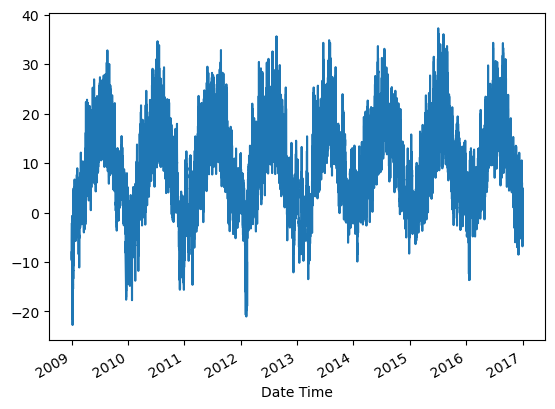

In [8]:
temp = df['T (degC)']
temp.plot()

The df must transform into a "sliding window" input and output structure, that works as shown below:

Input: [[[1],[2],[3],[4],[5]]] --> Predicted output: [[6]]

Input: [[[2],[3],[4],[5],[6]]] --> Predicted output: [[7]]

These input numbers mean the temperature at day 1, day 2, day 3, day 4, day 5 and day 6 will be predicted temperature

In [9]:
def df_sliding_window(df, window_size):
    numpyDf = df.to_numpy()
    X = []
    y = []
    for i in range(len(numpyDf) - window_size):
        row = [[a] for a in numpyDf[i:i+window_size]]
        X.append(row)
        label = numpyDf[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [10]:
window = 5
X1, y1 = df_sliding_window(temp, window)
X1.shape, y1.shape

((70086, 5, 1), (70086,))

Splitting data into test, validation and train sets.

In [11]:
X_train, y_train = X1[:60000], y1[:60000]
X_val, y_val = X1[60000:65000], y1[60000:65000]
X_test, y_test = X1[65000:], y1[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

### LSTM Model Creation  

In [12]:
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5,1)))
model.add(LSTM(64))
model.add(Dense(8,'relu'))
model.add(Dense(1, 'linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
checkpoint = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[checkpoint])

Epoch 1/10

1870/1875 [============================>.] - ETA: 0s - loss: 10.3201 - root_mean_squared_error: 3.2125INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 25s 11ms/step - loss: 10.2942 - root_mean_squared_error: 3.2085 - val_loss: 0.5857 - val_root_mean_squared_error: 0.7653
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6932 - root_mean_squared_error: 0.8326INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.6930 - root_mean_squared_error: 0.8325 - val_loss: 0.5025 - val_root_mean_squared_error: 0.7089
Epoch 3/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6773 - root_mean_squared_error: 0.8230INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 17s 9ms/step - loss: 0.6774 - root_mean_squared_error: 0.8230 - val_loss: 0.4963 - val_root_mean_squared_error: 0.7045
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6717 - root_mean_squared_error: 0.8196INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.6717 - root_mean_squared_error: 0.8196 - val_loss: 0.4884 - val_root_mean_squared_error: 0.6988
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6609 - root_mean_squared_error: 0.8130INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6612 - root_mean_squared_error: 0.8131 - val_loss: 0.4875 - val_root_mean_squared_error: 0.6982
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.6572 - root_mean_squared_error: 0.8107INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.6571 - root_mean_squared_error: 0.8106 - val_loss: 0.4843 - val_root_mean_squared_error: 0.6959
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6574 - root_mean_squared_error: 0.8108 - val_loss: 0.5042 - val_root_mean_squared_error: 0.7101
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6515 - root_mean_squared_error: 0.8071 - val_loss: 0.5228 - val_root_mean_squared_error: 0.7230
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6512 - root_mean_squared_error: 0.8070 - val_loss: 0.5429 - val_root_mean_squared_error: 0.7368
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6501 - root_mean_squared_error: 0.8063 - val_loss: 0.5292 - val_root_mean_squared_error: 0.7275


In [14]:
from keras.models import load_model
model = load_model('model/')

#### Training Set

1875/1875 [==============================] - 8s 4ms/step


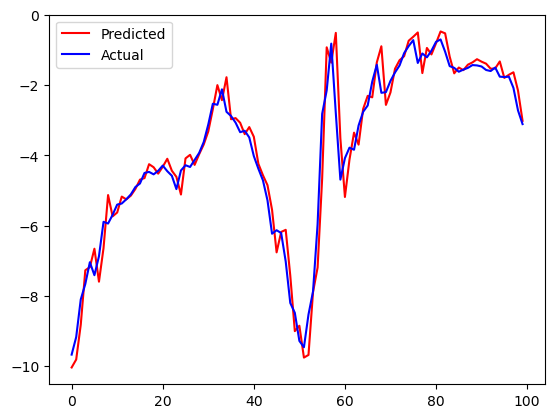

(       Predictions  Actuals
 0       -10.035962    -9.67
 1        -9.809220    -9.17
 2        -8.820178    -8.10
 3        -7.268729    -7.66
 4        -7.180816    -7.04
 ...            ...      ...
 59995     6.241397     6.07
 59996     7.149394     9.88
 59997    12.030221    13.53
 59998    15.482013    15.43
 59999    16.328106    15.54
 
 [60000 rows x 2 columns],
 0.6454488468843491)

In [15]:
plot_pred(model,X_train,y_train)

#### Validation Set

157/157 [==============================] - 1s 4ms/step


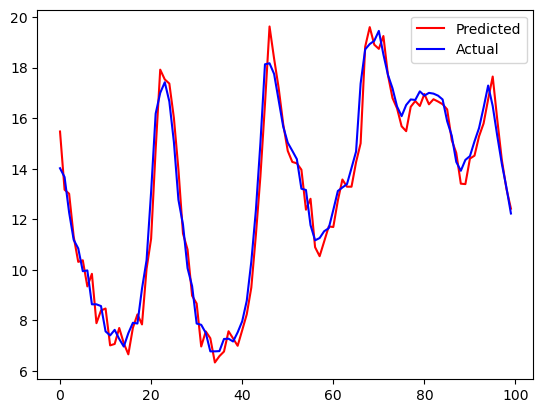

(      Predictions  Actuals
 0       15.472295    14.02
 1       13.171227    13.67
 2       13.011390    12.27
 3       11.316319    11.19
 4       10.317871    10.85
 ...           ...      ...
 4995    17.158989    18.27
 4996    17.388958    17.85
 4997    17.039141    16.65
 4998    15.706008    15.85
 4999    14.970185    15.09
 
 [5000 rows x 2 columns],
 0.48431959810154823)

In [16]:
plot_pred(model,X_val,y_val)

#### Test Set

159/159 [==============================] - 1s 4ms/step


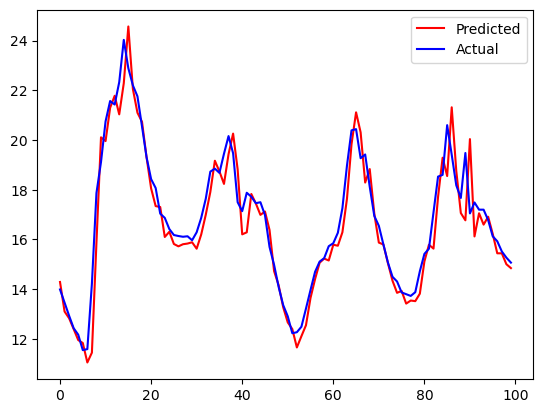

(      Predictions  Actuals
 0       14.290341    13.99
 1       13.102197    13.46
 2       12.830688    12.93
 3       12.394375    12.43
 4       11.953441    12.17
 ...           ...      ...
 5081    -1.245095    -0.98
 5082    -1.439372    -1.40
 5083    -1.667870    -2.75
 5084    -2.971488    -2.89
 5085    -3.074929    -3.93
 
 [5086 rows x 2 columns],
 0.6464566095213155)

In [17]:
plot_pred(model, X_test, y_test)

### Convolutional Neural Network Model

In [23]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(Conv1D(64, kernel_size=2))
model1.add(Flatten())
model1.add(Dense(8,'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 2056      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
checkpoint1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [26]:
model1.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[checkpoint1])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 1.9184 - root_mean_squared_error: 1.3851INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 10s 5ms/step - loss: 1.9138 - root_mean_squared_error: 1.3834 - val_loss: 0.5260 - val_root_mean_squared_error: 0.7253
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.7056 - root_mean_squared_error: 0.8400 - val_loss: 0.5340 - val_root_mean_squared_error: 0.7308
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.7108 - root_mean_squared_error: 0.8431INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.7112 - root_mean_squared_error: 0.8433 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6984
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6903 - root_mean_squared_error: 0.8309 - val_loss: 0.4883 - val_root_mean_squared_error: 0.6988
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6898 - root_mean_squared_error: 0.8305 - val_loss: 0.5299 - val_root_mean_squared_error: 0.7279
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6780 - root_mean_squared_error: 0.8234 - val_loss: 0.5027 - val_root_mean_squared_error: 0.7090
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6796 - root_mean_squared_error: 0.8244 - val_loss: 0.5593 - val_root_mean_squared_error: 0.7478
Epoch 8/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.6804 - root_mean_squared_error: 0.8248INFO:tensorflow:Assets writ

INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6799 - root_mean_squared_error: 0.8246 - val_loss: 0.4860 - val_root_mean_squared_error: 0.6971
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6716 - root_mean_squared_error: 0.8195 - val_loss: 0.4926 - val_root_mean_squared_error: 0.7018
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6684 - root_mean_squared_error: 0.8176 - val_loss: 0.6194 - val_root_mean_squared_error: 0.7870


In [27]:
from keras.models import load_model
model1 = load_model('model1/')

#### Training Set

1875/1875 [==============================] - 5s 3ms/step


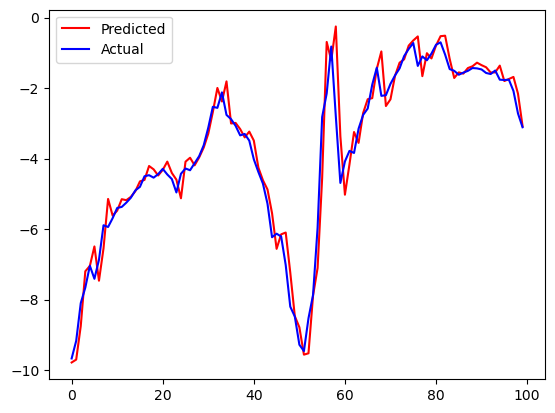

(       Predictions  Actuals
 0        -9.783868    -9.67
 1        -9.702597    -9.17
 2        -8.749814    -8.10
 3        -7.196158    -7.66
 4        -7.045606    -7.04
 ...            ...      ...
 59995     6.260646     6.07
 59996     7.206313     9.88
 59997    12.308029    13.53
 59998    16.000080    15.43
 59999    17.022503    15.54
 
 [60000 rows x 2 columns],
 0.6422688259939469)

In [28]:
plot_pred(model1,X_train,y_train)

#### Validation Set

157/157 [==============================] - 1s 2ms/step


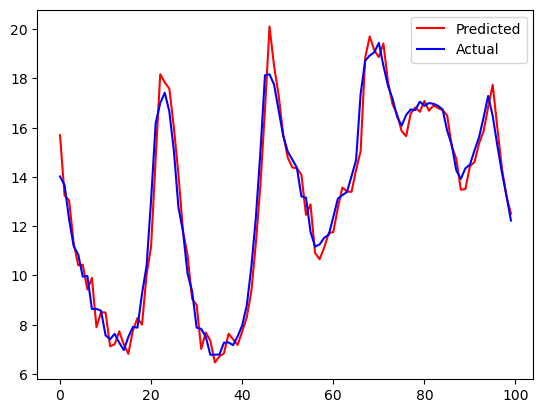

(      Predictions  Actuals
 0       15.695461    14.02
 1       13.246808    13.67
 2       13.044753    12.27
 3       11.310159    11.19
 4       10.415096    10.85
 ...           ...      ...
 4995    17.365135    18.27
 4996    17.610300    17.85
 4997    17.249800    16.65
 4998    15.944408    15.85
 4999    15.085390    15.09
 
 [5000 rows x 2 columns],
 0.4859926527653521)

In [29]:
plot_pred(model1,X_val,y_val)

#### Test Set

159/159 [==============================] - 1s 3ms/step


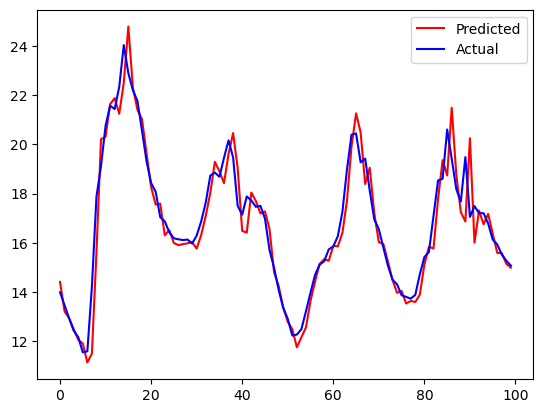

(      Predictions  Actuals
 0       14.409505    13.99
 1       13.210958    13.46
 2       12.934902    12.93
 3       12.487937    12.43
 4       12.058669    12.17
 ...           ...      ...
 5081    -1.206469    -0.98
 5082    -1.431750    -1.40
 5083    -1.617311    -2.75
 5084    -3.144279    -2.89
 5085    -3.130582    -3.93
 
 [5086 rows x 2 columns],
 0.6304766356166333)

In [30]:
plot_pred(model1,X_test,y_test)

### Gated Recurrent Unit Model

In [32]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(GRU(64))
model2.add(Dense(8,'relu'))
model2.add(Dense(1,'linear'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
checkpoint2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model2.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[checkpoint2])

Epoch 1/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6469 - root_mean_squared_error: 0.8043INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 23s 11ms/step - loss: 0.6474 - root_mean_squared_error: 0.8046 - val_loss: 0.4954 - val_root_mean_squared_error: 0.7038
Epoch 2/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.6421 - root_mean_squared_error: 0.8013INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6420 - root_mean_squared_error: 0.8013 - val_loss: 0.4849 - val_root_mean_squared_error: 0.6963
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6422 - root_mean_squared_error: 0.8014 - val_loss: 0.5385 - val_root_mean_squared_error: 0.7338
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6401 - root_mean_squared_error: 0.8001 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6390 - root_mean_squared_error: 0.7994 - val_loss: 0.4898 - val_root_mean_squared_error: 0.6998
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6384 - root_mean_squared_error: 0.7990 - val_loss: 0.4861 - val_root_mean_squared_error: 0.6972
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6384 - root_mean_squared_error: 0.7990 - val_loss: 0.600

In [39]:
from keras.models import load_model
model2 = load_model('model2/')

#### Training Set

1875/1875 [==============================] - 29s 14ms/step


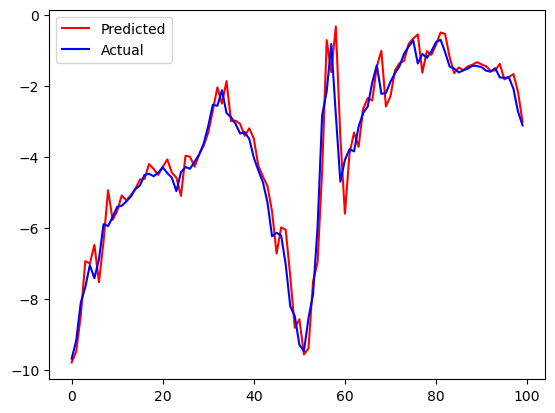

(       Predictions  Actuals
 0        -9.778786    -9.67
 1        -9.471028    -9.17
 2        -8.463984    -8.10
 3        -6.928205    -7.66
 4        -6.996757    -7.04
 ...            ...      ...
 59995     6.145612     6.07
 59996     7.245511     9.88
 59997    12.029240    13.53
 59998    15.309208    15.43
 59999    16.393101    15.54
 
 [60000 rows x 2 columns],
 0.6250592857991005)

In [40]:
plot_pred(model2,X_train,y_train)

#### Validation Set

157/157 [==============================] - 2s 5ms/step


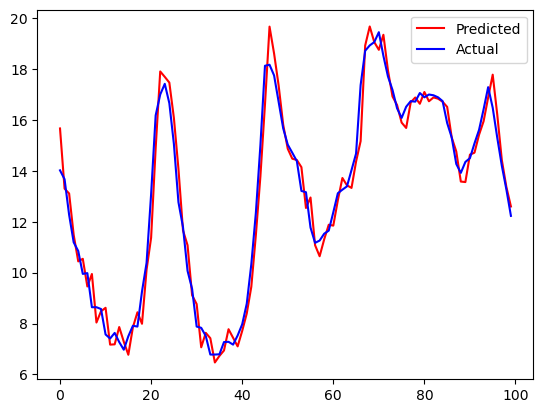

(      Predictions  Actuals
 0       15.665831    14.02
 1       13.300076    13.67
 2       13.109297    12.27
 3       11.482419    11.19
 4       10.441670    10.85
 ...           ...      ...
 4995    17.722303    18.27
 4996    17.688892    17.85
 4997    17.247501    16.65
 4998    15.916151    15.85
 4999    15.148127    15.09
 
 [5000 rows x 2 columns],
 0.48488551422371673)

In [41]:
plot_pred(model2,X_val,y_val)

#### Testing Set

159/159 [==============================] - 1s 5ms/step


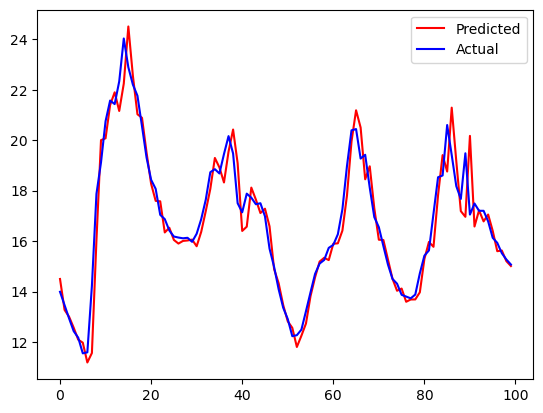

(      Predictions  Actuals
 0       14.497570    13.99
 1       13.271238    13.46
 2       12.997648    12.93
 3       12.567172    12.43
 4       12.091405    12.17
 ...           ...      ...
 5081    -0.877764    -0.98
 5082    -1.373028    -1.40
 5083    -1.563089    -2.75
 5084    -3.190350    -2.89
 5085    -2.998658    -3.93
 
 [5086 rows x 2 columns],
 0.6019779656274921)

In [42]:
plot_pred(model2,X_test,y_test)

## Multi-Variate Prediction of Temperature

The second section of this jupyter notebook will apply various Neural Networks to make time series prediction of temperature using multiple variables. Using the rhythmic cycles of temperture fluctuations thoughtout the year to get a better prediction.

### Data Preprocessing

Getting the periodic day and year cycles by applying sine and cosine of the seconds column. 

In [50]:
temp_df = pd.DataFrame({'Temperature':temp})
# Getting seconds from timestamp
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
# Seconds in a day
day = 60*60*24
# Seconds in a year
year = 365.2425*day

temp_df['Day Sin'] = np.sin(temp_df['Seconds']*(2*np.pi/day))
temp_df['Day Cos'] = np.cos(temp_df['Seconds']*(2*np.pi/day))
temp_df['Year Sin'] = np.sin(temp_df['Seconds']*(2*np.pi/year))
temp_df['Year Cos'] = np.cos(temp_df['Seconds']*(2*np.pi/year))
temp_df = temp_df.drop('Seconds', axis=1)
temp_df

,Temperature,Day Sin,Day Cos,Year Sin,Year Cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


The df must transform into a "sliding window" input and output structure, that works as shown below:

Input: [[[temp1,daysin1,daycos1,yearsin1,yearcos1],[temp2,daysin2,daycos2,yearsin2,yearcos2],[temp3,daysin2,daycos2,yearsin2,yearcos2],[temp4,daysin4,daycos4,yearsin4,yearcos4],[temp5,daysin5,daycos5,yearsin5,yearcos5]]] --> Predicted output: [[temp6]]

Input: [[[temp2,daysin2,daycos2,yearsin2,yearcos2],[temp3,daysin3,daycos3,yearsin3,yearcos3],[temp4,daysin4,daycos4,yearsin4,yearcos4],[temp5,daysin5,daycos5,yearsin5,yearcos5],[temp6,daysin6,daycos6,yearsin6,yearcos6]]] --> Predicted output: [[temp7]]

These input numbers mean the variables at day 1, day 2, day 3, day 4, day 5 and day 6 will be predicted temperature

In [53]:
def df_sliding_window1(df, window_size=6):
    numpyDf = df.to_numpy()
    X = []
    y = []
    for i in range(len(numpyDf)-window_size):
        row = [r for r in numpyDf[i:i+window_size]]
        X.append(row)
        label = numpyDf[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)



In [54]:
X2, y2 = df_sliding_window1(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [55]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

Standardizing the temperature column to be on a similar scale as the rest of the columns.

In [65]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std 
  return X


In [66]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

### LSTM Model Creation

In [67]:
model3 = Sequential()
model3.add(InputLayer((6,5)))
model3.add(LSTM(64))
model3.add(Dense(8,'relu'))
model3.add(Dense(1,'linear'))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                17920     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
checkpoint3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model3.fit(X2_train, y2_train, validation_data=(X2_val,y2_val), epochs=10, callbacks=[checkpoint3])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 8.1731 - root_mean_squared_error: 2.8589INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 32s 14ms/step - loss: 8.1731 - root_mean_squared_error: 2.8589 - val_loss: 0.6899 - val_root_mean_squared_error: 0.8306
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5981 - root_mean_squared_error: 0.7733INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.5979 - root_mean_squared_error: 0.7732 - val_loss: 0.4285 - val_root_mean_squared_error: 0.6546
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5609 - root_mean_squared_error: 0.7489 - val_loss: 0.4382 - val_root_mean_squared_error: 0.6619
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.5557 - root_mean_squared_error: 0.7455 - val_loss: 0.4447 - val_root_mean_squared_error: 0.6669
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5469 - root_mean_squared_error: 0.7396 - val_loss: 0.4316 - val_root_mean_squared_error: 0.6570
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.5398 - root_mean_squared_error: 0.7347 - val_loss: 0.4393 - val_root_mean_squared_error: 0.6628
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.5336 - root_mean_squared_error: 0.7305 - val_loss: 0

INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 80s 42ms/step - loss: 0.5329 - root_mean_squared_error: 0.7300 - val_loss: 0.3998 - val_root_mean_squared_error: 0.6323
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.5265 - root_mean_squared_error: 0.7256 - val_loss: 0.4256 - val_root_mean_squared_error: 0.6524
Epoch 10/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5229 - root_mean_squared_error: 0.7232 - val_loss: 0.4149 - val_root_mean_squared_error: 0.6441


In [69]:
model3 = load_model('model3/')

#### Training Set

1875/1875 [==============================] - 13s 6ms/step


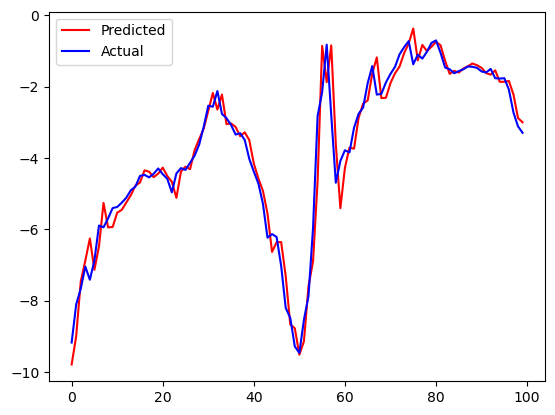

(       Predictions  Actuals
 0        -9.784971    -9.17
 1        -8.991112    -8.10
 2        -7.459723    -7.66
 3        -6.876378    -7.04
 4        -6.251734    -7.41
 ...            ...      ...
 59995     7.430840     9.88
 59996    11.626860    13.53
 59997    14.977933    15.43
 59998    15.865349    15.54
 59999    14.923615    14.02
 
 [60000 rows x 2 columns],
 0.5064580316038116)

In [70]:
plot_pred(model3,X2_train,y2_train)

#### Validation Set

157/157 [==============================] - 2s 7ms/step


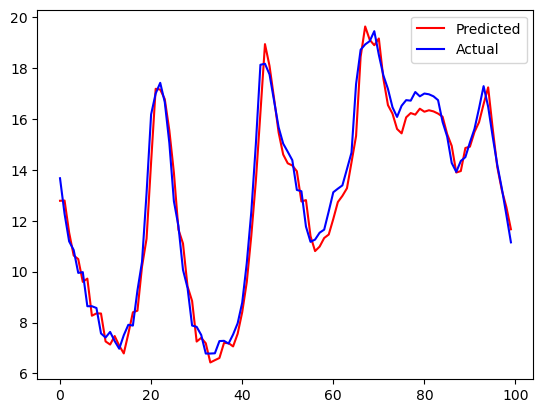

(      Predictions  Actuals
 0       12.784905    13.67
 1       12.794291    12.27
 2       11.537050    11.19
 3       10.632246    10.85
 4       10.494106     9.95
 ...           ...      ...
 4995    17.267847    17.85
 4996    16.969179    16.65
 4997    15.796837    15.85
 4998    15.098707    15.09
 4999    14.410004    13.99
 
 [5000 rows x 2 columns],
 0.39978923667770994)

In [71]:
plot_pred(model3,X2_val,y2_val)

#### Test Set

159/159 [==============================] - 1s 6ms/step


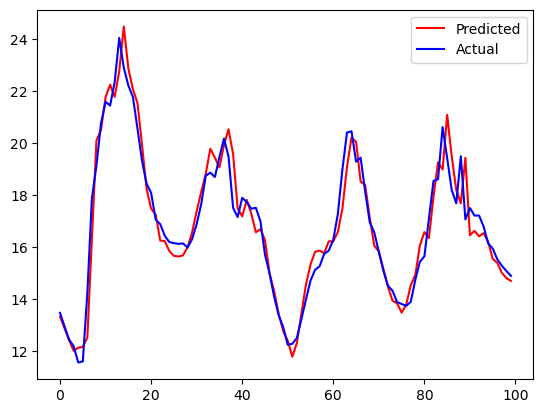

(      Predictions  Actuals
 0       13.312948    13.46
 1       12.861802    12.93
 2       12.400002    12.43
 3       11.998688    12.17
 4       12.117433    11.55
 ...           ...      ...
 5080    -0.962946    -0.98
 5081    -1.401402    -1.40
 5082    -1.682281    -2.75
 5083    -3.119761    -2.89
 5084    -3.196923    -3.93
 
 [5085 rows x 2 columns],
 0.4698888112735188)

In [72]:
plot_pred(model3,X2_test,y2_test)

### Convolutional Neural Network Model

In [74]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(Conv1D(64, kernel_size=2))
model4.add(Flatten())
model4.add(Dense(8,'relu'))
model4.add(Dense(1,'linear'))
model4.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 5, 64)             704       
                                                                 
 flatten_2 (Flatten)         (None, 320)               0         
                                                                 
 dense_16 (Dense)            (None, 8)                 2568      
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3281 (12.82 KB)
Trainable params: 3281 (12.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
checkpoint4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model4.fit(X2_train, y2_train, validation_data=(X2_val,y2_val), epochs=10, callbacks=[checkpoint4])

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 7.5549 - root_mean_squared_error: 2.7486INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 9s 4ms/step - loss: 7.5337 - root_mean_squared_error: 2.7448 - val_loss: 0.6422 - val_root_mean_squared_error: 0.8014
Epoch 2/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6611 - root_mean_squared_error: 0.8131INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6616 - root_mean_squared_error: 0.8134 - val_loss: 0.4767 - val_root_mean_squared_error: 0.6904
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6010 - root_mean_squared_error: 0.7753 - val_loss: 0.4852 - val_root_mean_squared_error: 0.6966
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5989 - root_mean_squared_error: 0.7739INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5993 - root_mean_squared_error: 0.7742 - val_loss: 0.4462 - val_root_mean_squared_error: 0.6680
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5933 - root_mean_squared_error: 0.7703 - val_loss: 0.4612 - val_root_mean_squared_error: 0.6791
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5900 - root_mean_squared_error: 0.7681 - val_loss: 0.4535 - val_root_mean_squared_error: 0.6734
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5861 - root_mean_squared_error: 0.7656 - val_loss: 0.4501 - val_root_mean_squared_error: 0.6709
Epoch 8/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.5794 - root_mean_squared_error: 0.7612INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5803 - root_mean_squared_error: 0.7618 - val_loss: 0.4451 - val_root_mean_squared_error: 0.6672
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5740 - root_mean_squared_error: 0.7576 - val_loss: 0.4890 - val_root_mean_squared_error: 0.6993
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5742 - root_mean_squared_error: 0.7578INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5740 - root_mean_squared_error: 0.7576 - val_loss: 0.4286 - val_root_mean_squared_error: 0.6547


In [76]:
model4 = load_model('model4/')

#### Training Set

1875/1875 [==============================] - 5s 3ms/step


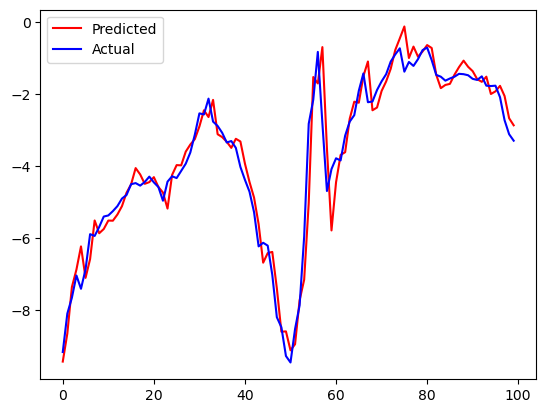

(       Predictions  Actuals
 0        -9.435242    -9.17
 1        -8.655354    -8.10
 2        -7.363440    -7.66
 3        -6.876085    -7.04
 4        -6.231522    -7.41
 ...            ...      ...
 59995     7.100575     9.88
 59996    11.369477    13.53
 59997    14.987164    15.43
 59998    16.197886    15.54
 59999    15.461412    14.02
 
 [60000 rows x 2 columns],
 0.5487659410045623)

In [77]:
plot_pred(model4,X2_train,y2_train)

#### Validation Set

157/157 [==============================] - 1s 4ms/step


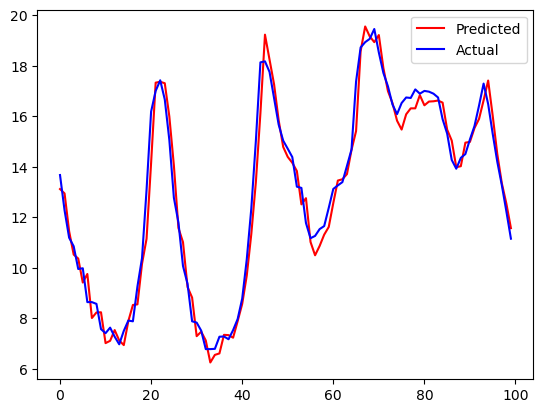

(      Predictions  Actuals
 0       13.115105    13.67
 1       12.941530    12.27
 2       11.445340    11.19
 3       10.520147    10.85
 4       10.364329     9.95
 ...           ...      ...
 4995    17.321827    17.85
 4996    16.922754    16.65
 4997    15.614636    15.85
 4998    15.025928    15.09
 4999    14.403951    13.99
 
 [5000 rows x 2 columns],
 0.42860355032097813)

In [78]:
plot_pred(model4,X2_val,y2_val)

#### Test Set

159/159 [==============================] - 0s 3ms/step


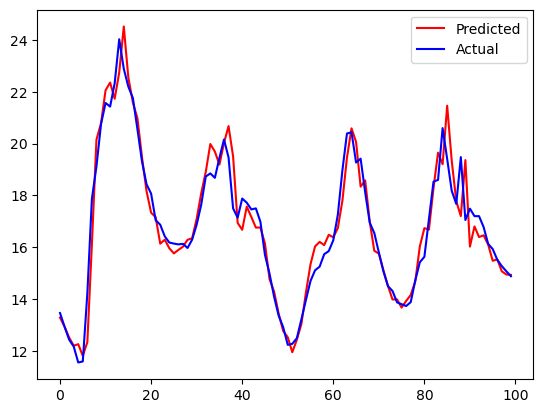

(      Predictions  Actuals
 0       13.283640    13.46
 1       12.931163    12.93
 2       12.516477    12.43
 3       12.197581    12.17
 4       12.256114    11.55
 ...           ...      ...
 5080    -1.351142    -0.98
 5081    -1.412524    -1.40
 5082    -1.484465    -2.75
 5083    -2.911703    -2.89
 5084    -2.847786    -3.93
 
 [5085 rows x 2 columns],
 0.5132227145221305)

In [79]:
plot_pred(model4,X2_test,y2_test)

### Gated Recurrent Unit Model

In [81]:
model5 = Sequential()
model5.add(InputLayer((6,5)))
model5.add(GRU(64))
model5.add(Dense(8,'relu'))
model5.add(Dense(1,'linear'))
model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                13632     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 14161 (55.32 KB)
Trainable params: 14161 (55.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
checkpoint5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model5.fit(X2_train, y2_train, validation_data=(X2_val,y2_val), epochs=10, callbacks=[checkpoint5])

Epoch 1/10
1872/1875 [============================>.] - ETA: 0s - loss: 5.0502 - root_mean_squared_error: 2.2473INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 12ms/step - loss: 5.0430 - root_mean_squared_error: 2.2457 - val_loss: 0.6406 - val_root_mean_squared_error: 0.8004
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6137 - root_mean_squared_error: 0.7834INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 15s 8ms/step - loss: 0.6137 - root_mean_squared_error: 0.7834 - val_loss: 0.4735 - val_root_mean_squared_error: 0.6881
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.5668 - root_mean_squared_error: 0.7528INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 16s 8ms/step - loss: 0.5663 - root_mean_squared_error: 0.7525 - val_loss: 0.4177 - val_root_mean_squared_error: 0.6463
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5550 - root_mean_squared_error: 0.7450 - val_loss: 0.4463 - val_root_mean_squared_error: 0.6681
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5408 - root_mean_squared_error: 0.7354 - val_loss: 0.4247 - val_root_mean_squared_error: 0.6517
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5367 - root_mean_squared_error: 0.7326 - val_loss: 0.4191 - val_root_mean_squared_error: 0.6474
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5302 - root_mean_squared_error: 0.7282 - val_loss: 0.4688 - val_root_mean_squared_error: 0.6847
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5280 - root_mean_squared_error: 0.7266INFO:tensorflow:Assets 

INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 55s 29ms/step - loss: 0.5281 - root_mean_squared_error: 0.7267 - val_loss: 0.4131 - val_root_mean_squared_error: 0.6427
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5246 - root_mean_squared_error: 0.7243INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 61s 33ms/step - loss: 0.5244 - root_mean_squared_error: 0.7242 - val_loss: 0.4018 - val_root_mean_squared_error: 0.6339
Epoch 10/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5203 - root_mean_squared_error: 0.7213 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6711


In [83]:
model5 = load_model('model5/')

#### Training Model

1875/1875 [==============================] - 7s 3ms/step


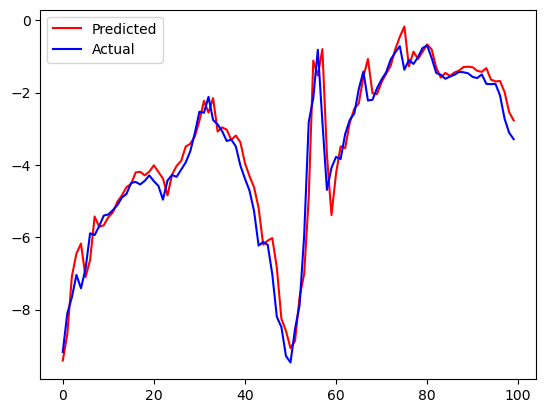

(       Predictions  Actuals
 0        -9.406999    -9.17
 1        -8.676482    -8.10
 2        -7.080361    -7.66
 3        -6.453611    -7.04
 4        -6.172636    -7.41
 ...            ...      ...
 59995     7.403723     9.88
 59996    11.770471    13.53
 59997    15.381760    15.43
 59998    16.142754    15.54
 59999    15.111545    14.02
 
 [60000 rows x 2 columns],
 0.5113741415612661)

In [84]:
plot_pred(model5,X2_train,y2_train)

#### Validation Model

157/157 [==============================] - 1s 4ms/step


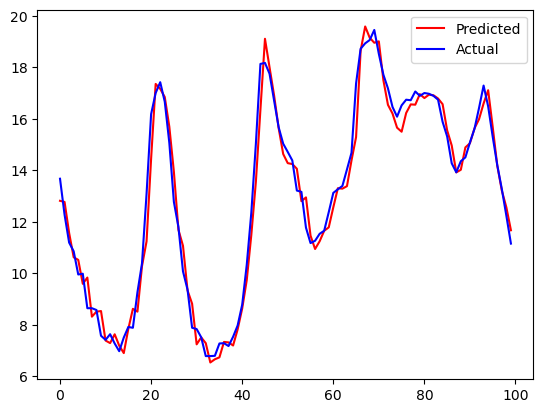

(      Predictions  Actuals
 0       12.812322    13.67
 1       12.768166    12.27
 2       11.563480    11.19
 3       10.616536    10.85
 4       10.518553     9.95
 ...           ...      ...
 4995    17.354982    17.85
 4996    16.948456    16.65
 4997    15.846873    15.85
 4998    15.189588    15.09
 4999    14.547483    13.99
 
 [5000 rows x 2 columns],
 0.40184043520223894)

In [85]:
plot_pred(model5,X2_val,y2_val)

#### Test Model

159/159 [==============================] - 1s 4ms/step


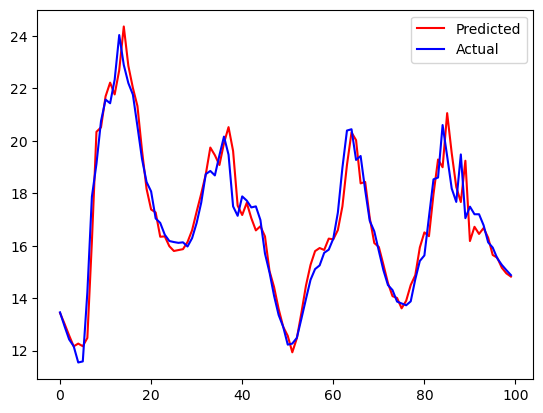

(      Predictions  Actuals
 0       13.437672    13.46
 1       13.022893    12.93
 2       12.579847    12.43
 3       12.166488    12.17
 4       12.269505    11.55
 ...           ...      ...
 5080    -0.938374    -0.98
 5081    -1.287362    -1.40
 5082    -1.580130    -2.75
 5083    -2.962712    -2.89
 5084    -2.963904    -3.93
 
 [5085 rows x 2 columns],
 0.46825378601192524)

In [86]:
plot_pred(model5,X2_test,y2_test)

## Multi-Variate Model Prediction of Temperature and Pressure

The third section of this jupyter notebook will apply Neural Network of best fit to make time series prediction on temperature and pressure using multiple variables. Using the rhythmic cycles of temperture fluctuations thoughtout the year to get a better prediction.

#### Data Preprocessing

Adding pressure into the dataframe

In [87]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day Sin,Day Cos,Year Sin,Year Cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [98]:
def df_sliding_window2(df, window_size=7):
    numpyDf = df.to_numpy()
    X = []
    y = []
    for i in range(len(numpyDf)-window_size):
        row = [r for r in numpyDf[i:i+window_size]]
        X.append(row)
        label = [numpyDf[i+window_size][0], numpyDf[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [99]:
X3, y3 = df_sliding_window2(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [100]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [101]:
p_training_mean = np.mean(X3_train[:,:,0])
p_training_std = np.std(X3_train[:,:,0])

temp_training_mean = np.mean(X3_train[:,:,1])
temp_training_std = np.std(X3_train[:,:,1])

def preprocess_input(X):
    X[:,:,0] = (X[:,:,0]-p_training_mean)/p_training_std
    X[:,:,1] = (X[:,:,1]-temp_training_mean)/temp_training_std

def preprocess_output(y):
    y[:,0] = (y[:,0]-p_training_mean)/p_training_std
    y[:,1] = (y[:,1]-temp_training_mean)/temp_training_std

In [102]:
preprocess_input(X3_train)
preprocess_input(X3_val)
preprocess_input(X3_test)

In [103]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

#### LSTM Model

In [106]:
model6 = Sequential()
model6.add(InputLayer((7,6)))
model6.add(LSTM(64))
model6.add(Dense(8,'relu'))
model6.add(Dense(2,'linear'))
model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18176     
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
checkpoint6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])
model6.fit(X3_train, y3_train, validation_data=(X3_val,y3_val), epochs=10, callbacks=[checkpoint6])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0303 - root_mean_squared_error: 0.1742INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 21s 9ms/step - loss: 0.0303 - root_mean_squared_error: 0.1742 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0812
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0055 - root_mean_squared_error: 0.0742INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0652
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0053 - root_mean_squared_error: 0.0728INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 18s 10ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0714INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 18s 9ms/step - loss: 0.0051 - root_mean_squared_error: 0.0714 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0709INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.0050 - root_mean_squared_error: 0.0709 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0600
Epoch 6/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0049 - root_mean_squared_error: 0.0702INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0049 - root_mean_squared_error: 0.0702 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0594
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0048 - root_mean_squared_error: 0.0696 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0606
Epoch 9/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0048 - root_mean_squared_error: 0.0692INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 69s 37ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0581
Epoch 10/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0048 - root_mean_squared_error: 0.0692 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0598


In [109]:
model6 = load_model('model6/')

In [124]:
def plot_pred2(model, X, y, start=0, end=100):
    predictions = model.predict(X)
    p_pred, temp_pred = predictions[:,0], predictions[:,1]
    pressure_actual, temp_actual = y[:,0], y[:,1]
    df = pd.DataFrame(data={'Temperature Prediction':temp_pred,
                            'Temperature Actual':temp_actual,
                            'Pressure Prediction':p_pred,
                            'Pressure Actual':pressure_actual})
    plt.plot(df['Temperature Prediction'][start:end], 'r-', label="Temperature Prediction")
    plt.plot(df['Temperature Actual'][start:end], 'b-', label="Temperature Actual")
    plt.plot(df['Pressure Prediction'][start:end], 'g-', label="Pressure Predictions")
    plt.plot(df['Pressure Actual'][start:end], 'b-', label="Pressure Actual")
    plt.legend()
    plt.show()
    return df, mse(y, predictions)

#### Training Set

1875/1875 [==============================] - 8s 4ms/step


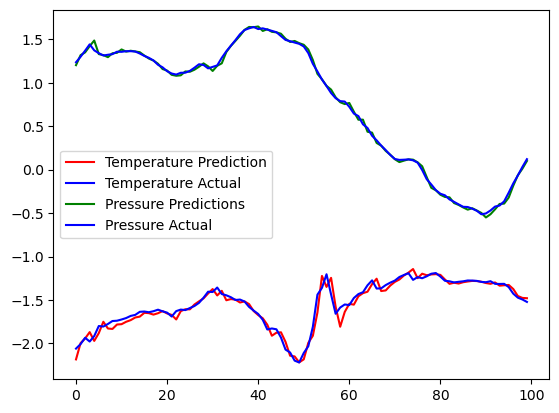

(       Temperature Prediction  Temperature Actual  Pressure Prediction  \
 0                   -2.183846           -2.059335             1.202878   
 1                   -1.996288           -2.007619             1.318189   
 2                   -1.942640           -1.934747             1.350236   
 3                   -1.869749           -1.978235             1.421767   
 4                   -1.970916           -1.914765             1.486749   
 ...                       ...                 ...                  ...   
 59995                0.295906            0.482972             0.625442   
 59996                0.683185            0.706291             0.605380   
 59997                0.764708            0.719220             0.584653   
 59998                0.655564            0.540565             0.598619   
 59999                0.408501            0.499428             0.635523   
 
        Pressure Actual  
 0             1.236506  
 1             1.299563  
 2             1.369

In [125]:
plot_pred2(model6, X3_train, y3_train)

#### Validation Set

157/157 [==============================] - 1s 4ms/step


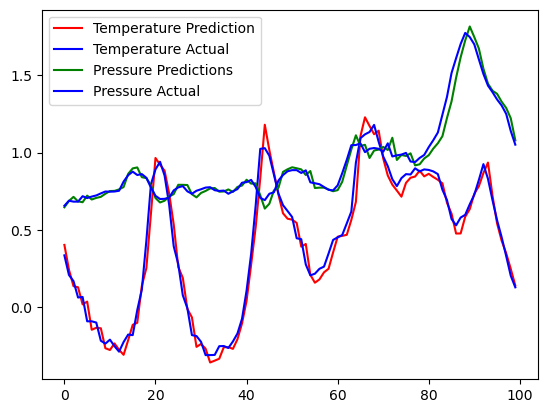

(      Temperature Prediction  Temperature Actual  Pressure Prediction  \
 0                   0.402518            0.334877             0.645851   
 1                   0.242590            0.207938             0.686748   
 2                   0.135307            0.167976             0.713170   
 3                   0.128320            0.062193             0.683652   
 4                   0.017630            0.065719             0.678613   
 ...                      ...                 ...                  ...   
 4995                0.879176            0.849685            -0.930202   
 4996                0.749306            0.755656            -0.888697   
 4997                0.673854            0.666329            -0.876031   
 4998                0.589798            0.537039            -0.855371   
 4999                0.455622            0.474745            -0.805048   
 
       Pressure Actual  
 0            0.655656  
 1            0.688397  
 2            0.682334  
 3        

In [126]:
plot_pred2(model6, X3_val, y3_val)

#### Test Set

159/159 [==============================] - 1s 7ms/step


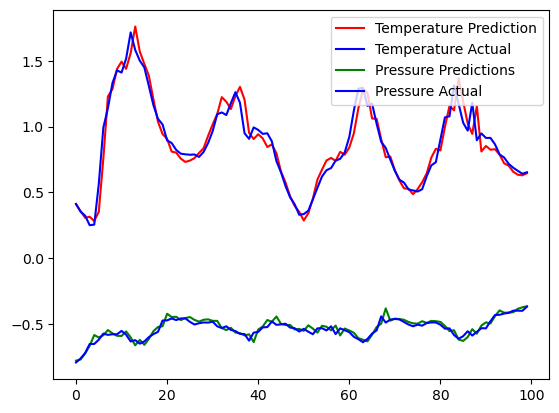

(      Temperature Prediction  Temperature Actual  Pressure Prediction  \
 0                   0.409787            0.412451            -0.779599   
 1                   0.357549            0.353683            -0.770962   
 2                   0.307310            0.323123            -0.725079   
 3                   0.314795            0.250251            -0.666397   
 4                   0.282563            0.254952            -0.584612   
 ...                      ...                 ...                  ...   
 5079               -1.259003           -1.222477             1.600276   
 5080               -1.281177           -1.271843             1.592107   
 5081               -1.299368           -1.430516             1.449927   
 5082               -1.504519           -1.446971             1.447377   
 5083               -1.497721           -1.569209             1.357311   
 
       Pressure Actual  
 0           -0.793439  
 1           -0.763123  
 2           -0.721893  
 3        

In [127]:
plot_pred2(model6, X3_test, y3_test)

#### Final Results

After apply post-processing we can see the actual unstandardized values of the predicted pressure and temperature. 

In [128]:
def postprocessing_temp(arr):
    arr = (arr*temp_training_std) + temp_training_mean
    return arr

def postprocessing_pressure(arr):
    arr = (arr*p_training_std) + p_training_mean
    return arr

In [139]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocessing_pressure(predictions[:, 0]), postprocessing_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocessing_pressure(y[:, 0]), postprocessing_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  return df

In [140]:
post_processed_df = get_predictions_postprocessed(model6, X3_test, y3_test)


159/159 [==============================] - 1s 4ms/step


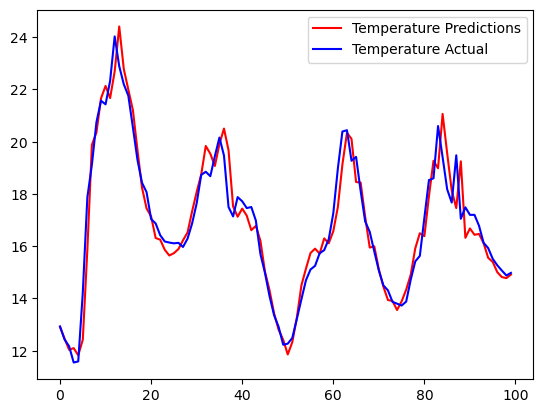

In [146]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end], '-r', label="Temperature Predictions")
plt.plot(post_processed_df['Temperature Actuals'][start:end], '-b', label='Temperature Actual')
plt.legend()
plt.show()

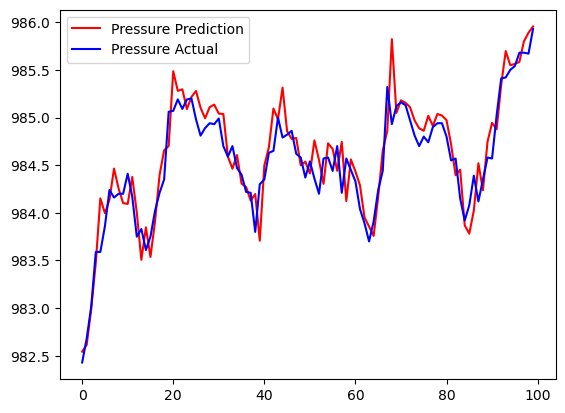

In [148]:
plt.plot(post_processed_df['Pressure Predictions'][start:end], '-r', label="Pressure Prediction")
plt.plot(post_processed_df['Pressure Actuals'][start:end], '-b', label="Pressure Actual")
plt.legend()
plt.show()